In [5]:
import sys, os
if os.path.abspath(os.pardir) not in sys.path:
    sys.path.insert(0, os.path.abspath(os.pardir))
import CONFIG
%reload_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
DATA_DIR = CONFIG.CFG.DATA.BASE

In [8]:
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
sub_df = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))
# remove the duplicates from the train_df
train_df.drop_duplicates(keep=False, inplace=True, subset=['Patient', 'Weeks'])

In [9]:
# get the unique portion of the data for the patients
data = train_df.groupby(by="Patient")[['Patient', 'Age', 'Sex', 'SmokingStatus']].first().reset_index(drop=True)

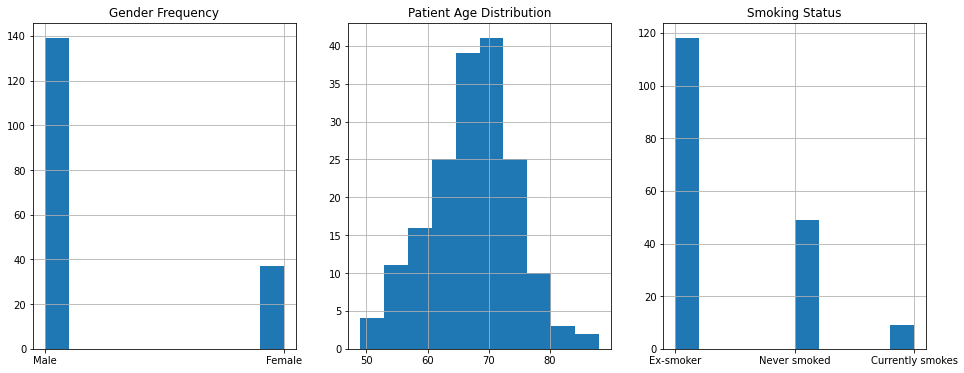

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))

ax1.set_title("Gender Frequency")
data['Sex'].hist(ax=ax1)
ax2.set_title("Patient Age Distribution")
data['Age'].hist(ax=ax2)
ax3.set_title("Smoking Status")
data['SmokingStatus'].hist(ax=ax3)

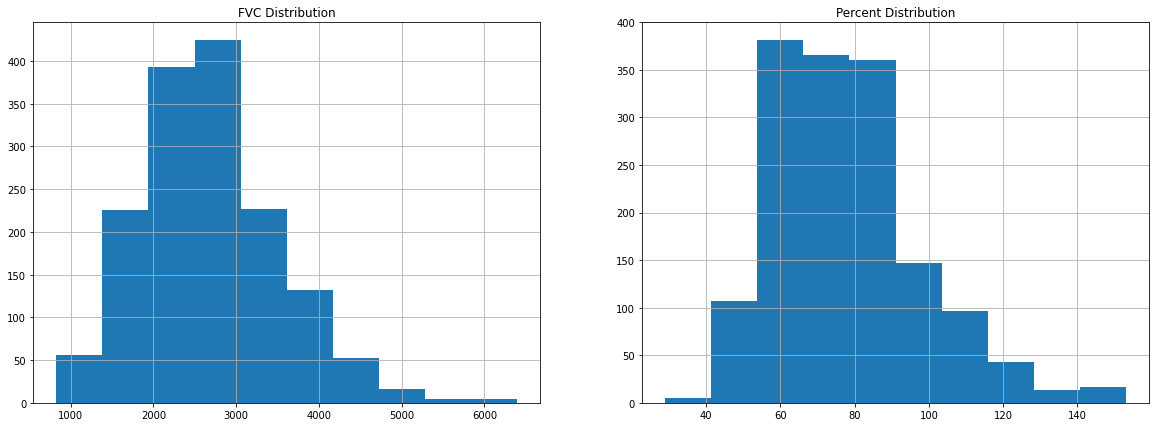

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.set_title("FVC Distribution")
train_df['FVC'].hist(ax=ax1)
ax2.set_title("Percent Distribution")
train_df['Percent'].hist(ax=ax2)

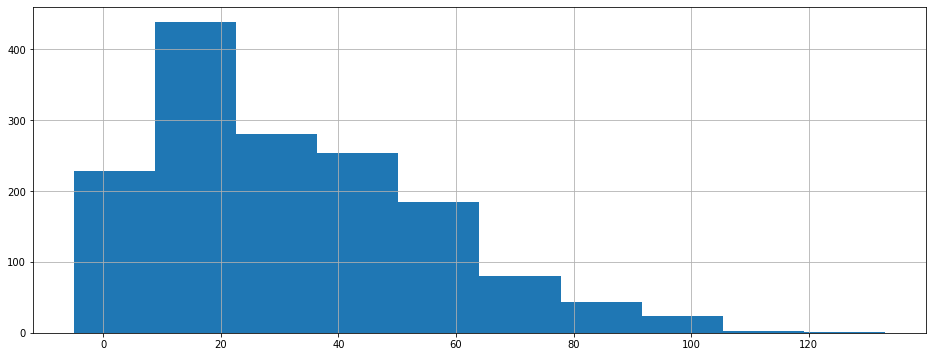

In [18]:
plt.figure(figsize=(16,6))
train_df['Weeks'].hist()

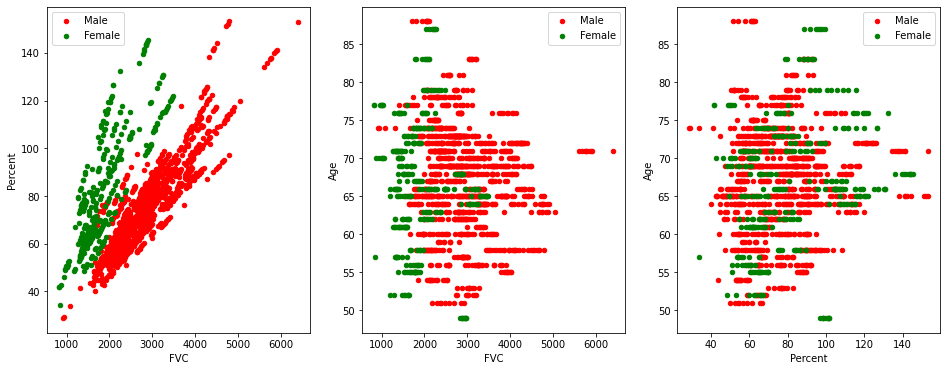

In [26]:
# FVC vs Percent plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))

# FVC vs Percent
male_df = train_df[train_df['Sex'] == 'Male']
female_df = train_df[train_df['Sex'] == 'Female']

male_df.plot.scatter('FVC', 'Percent', c='red', label='Male', ax=ax1)
female_df.plot.scatter('FVC', 'Percent', c='green', ax=ax1, label="Female")

# FVC vs Age
male_df.plot.scatter('FVC', 'Age', c='red', label='Male', ax=ax2)
female_df.plot.scatter('FVC', 'Age', c='green', label='Female', ax=ax2)

# Percent vs Age
male_df.plot.scatter('Percent', 'Age', c='red', label='Male', ax=ax3)
female_df.plot.scatter('Percent', 'Age', c='green', label='Female', ax=ax3)

<BarContainer object of 3 artists>

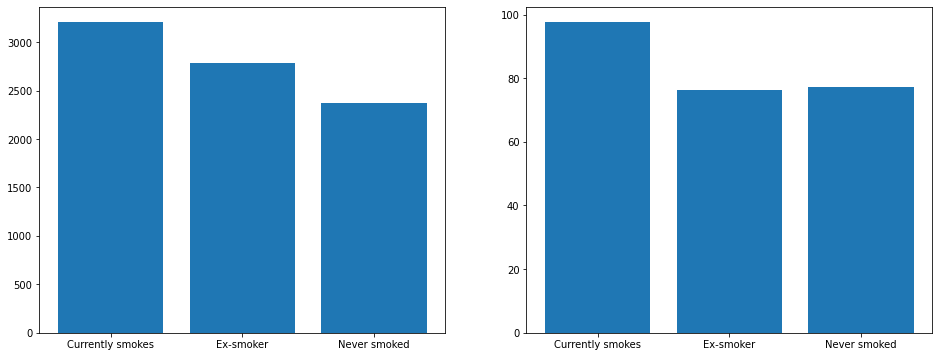

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.bar(train_df.groupby('SmokingStatus').mean()['FVC'].index, train_df.groupby('SmokingStatus').mean()['FVC'])
ax2.bar(train_df.groupby('SmokingStatus').mean()['Percent'].index, train_df.groupby('SmokingStatus').mean()['Percent'])

Patient
ID00007637202177411956430      [Line2D(_line0)]
ID00009637202177434476278      [Line2D(_line1)]
ID00010637202177584971671      [Line2D(_line2)]
ID00011637202177653955184      [Line2D(_line3)]
ID00012637202177665765362      [Line2D(_line4)]
                                    ...        
ID00419637202311204720264    [Line2D(_line171)]
ID00421637202311550012437    [Line2D(_line172)]
ID00422637202311677017371    [Line2D(_line173)]
ID00423637202312137826377    [Line2D(_line174)]
ID00426637202313170790466    [Line2D(_line175)]
Length: 176, dtype: object

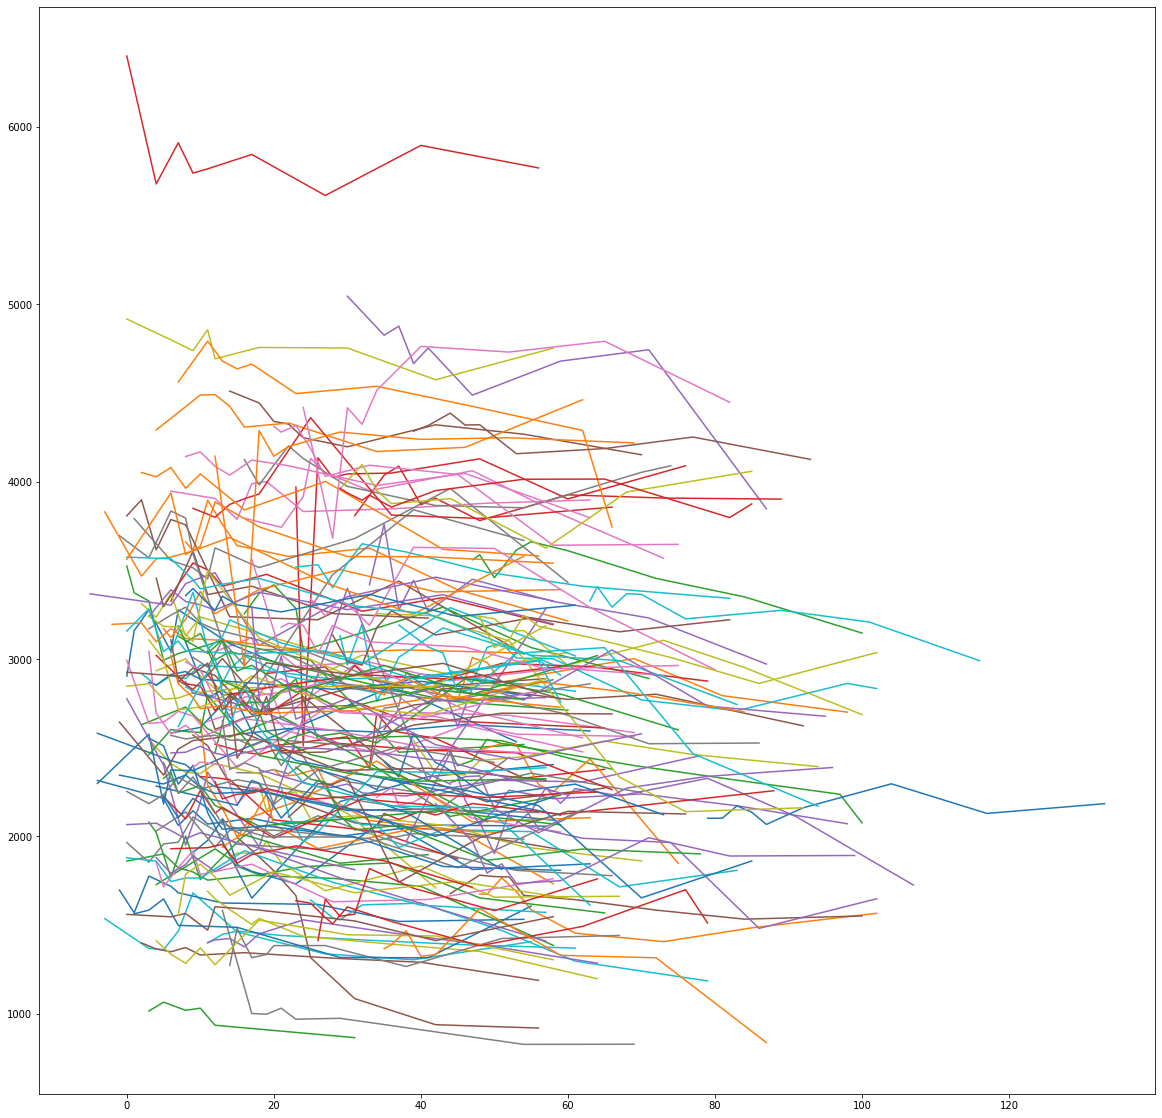

In [66]:
# change in FVC in patients
plt.figure(figsize=(20,20))
plt.title("FVC decrease with Weeks")
train_df.groupby('Patient').apply(lambda grp: plt.plot(grp['Weeks'], grp['FVC']))

In [93]:
number_of_ct = {x: len(os.listdir(os.path.join(DATA_DIR, "train", x))) for x in os.listdir(os.path.join(DATA_DIR, "train"))}
# sort by number_of_ct scans
number_of_ct = {k: v for k, v in sorted(number_of_ct.items(), key=lambda item: item[1])}

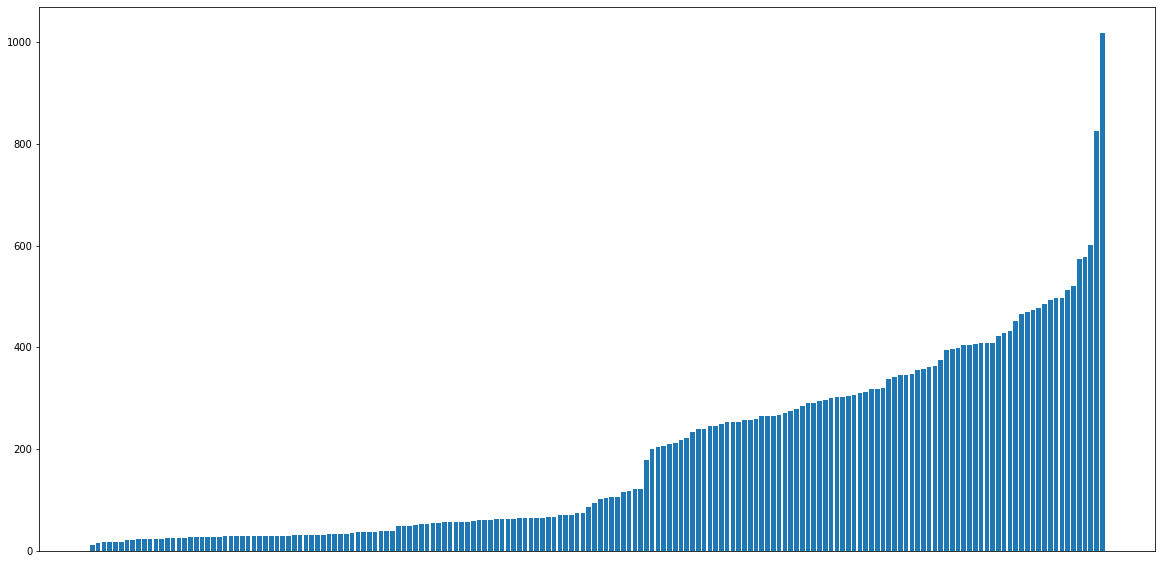

In [94]:
plt.figure(figsize=(20, 10))
plt.bar(number_of_ct.keys(), number_of_ct.values())
plt.title('Number of CT scans per patients')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)